# Multi linear regression 

We want to compute a multi linear regression between the parameter values for each perturbation and the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis). 

#### Emulator equation : Y = f(X) 
* Y is a 1x50 matrix containing the PCs values of the first EOF analysis of radiative feedbacks (SW and LW multivariate analysis).
* X is a 30X50 matrix containing the 30 values of the physical parameters, for the 50 perturbations.

## Import modules

In [9]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *

# Plotting modules 
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
import seaborn as sns; sns.set()

# Scikit-learn
from sklearn import linear_model
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

## Import functions

In [10]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

## Lasso Model (multi linear regression, Cross-Validation)

## Tunage du modèle

In [205]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/X_param.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/ENSEMBLE3_param_names.npy")

In [206]:
X.shape

(73, 5)

Computing regularization path using the coordinate descent lasso...


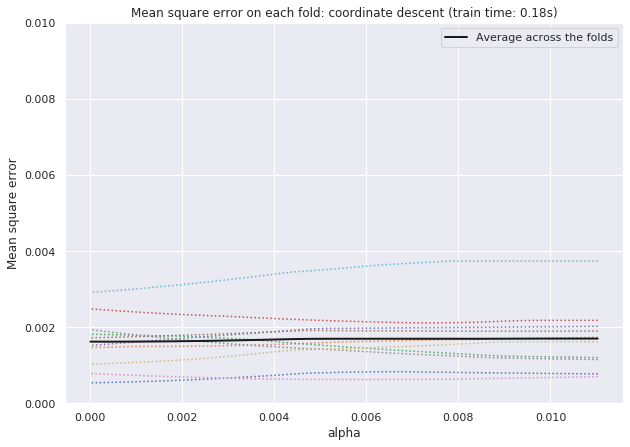

In [207]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=10).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 0.01
xmin, xmax = 0, 0.01
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Computing regularization path using the coordinate descent lasso...


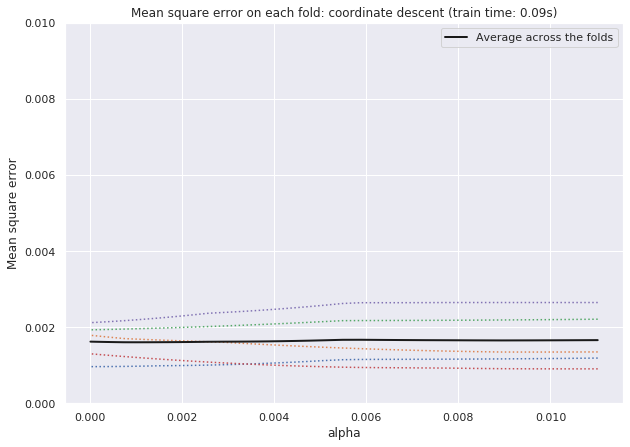

In [208]:
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=5).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
alphas = model.alphas_

plt.figure(figsize=(10, 7))
ymin, ymax = 0, 0.01
xmin, xmax = 0, 0.01
plt.plot(alphas, model.mse_path_, ':')
plt.plot(alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
#plt.axvline(model.alpha_, linestyle='--', color='k',
#            label='alpha: CV estimate')

plt.legend()

plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)
#plt.xlim(xmin, xmax)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/PPE_Lasso_CV5.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Creation du modèle

In [209]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/X_param.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/ENSEMBLE3_param_names.npy")

In [210]:
alpha = 0.0001

In [211]:
# Perform the lasso multi linear regression with the alpha found before
lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

print(lasso)
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)
print('Score: \n', lasso.score(X, y))

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 -1.4450728964043533
Coefficients: 
 [-0.00319884 -0.00947067  0.00612049 -0.01244094  0.00837287]
Score: 
 0.1891577400141553


In [212]:
#Coeffs = pd.DataFrame([lasso.coef_], columns=param_names).iloc[0]
Coeffs = pd.DataFrame([lasso.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs


ALMAVE   -0.003199
VVX      -0.009471
RKDN      0.006120
FNEBC    -0.012441
AGRE1     0.008373
Name: 0, dtype: float64

In [213]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(X_df.values)
tmp = [0]*N
y_eq = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq[i] = tmp[i].sum()+R
    i+=1
    
#y_eq 

In [214]:
nb_p_list = ['p600','p601','p602','p603','p604','p605','p607','p608','p609','p610','p611','p612',
             'p613','p614','p615','p616','p617','p618','p619','p621','p623','p625','p626','p627',
             'p629','p630','p631','p632','p633','p634','p636','p638','p639','p640','p641','p642','p644',
             'p646','p649','p650','p651','p652','p653','p655','p656','p657','p658',
             'p661','p662','p663','p664','p666','p668','p669','p670','p671','p674','p675','p676',
             'p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690']

y_true = y

DFYeq_lasso = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq_lasso['members'] = nb_p_list
DFYeq_lasso['members_0'] = range(0,73,1)
#DF=DFYeq.sort_values(by='y_true')
DFYeq_lasso

,y_true,y_eq,members,members_0
0,-1.446859,-1.433995,p600,0
1,-1.476661,-1.472198,p601,1
2,-1.456585,-1.436010,p602,2
3,-1.417429,-1.432042,p603,3
4,-1.382174,-1.419165,p604,4
...,...,...,...,...
68,-1.474378,-1.461020,p686,68
69,-1.456299,-1.443808,p687,69
70,-1.475609,-1.478458,p688,70
71,-1.457760,-1.455538,p689,71


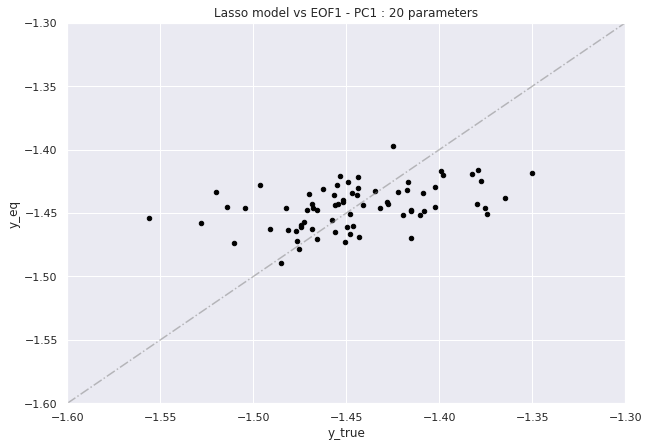

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

#print('Coefficient of determination: %.2f'
#      % r2_score(X_test, y_pred))

ax = plt.gca()
title = 'Lasso model vs EOF1 - PC1 : 20 parameters'

diag = pd.DataFrame(range(-4,5,1))
diag['x'] = diag[0]
diag['y'] = diag[0]
diag = diag.drop(columns = 0)
diag.plot(kind='line', x='x', y='y', color='gray', alpha=0.5, legend = False,linestyle='-.', ax = ax)

DFYeq_lasso.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred_lasso, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_eq')
plt.title(title)
plt.xlim(-1.6, -1.3)
plt.ylim(-1.6, -1.3)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE2_Lasso_12.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Coefficients: 
 [0.16037544]
Coefficient of determination: 0.27


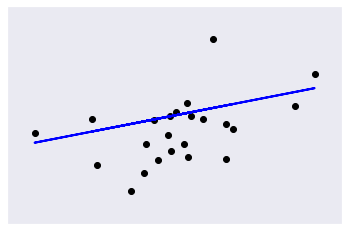

In [216]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_eq[:50]#.reshape(-1, 1) 
y_test = y_eq[50:]#.reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(X_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

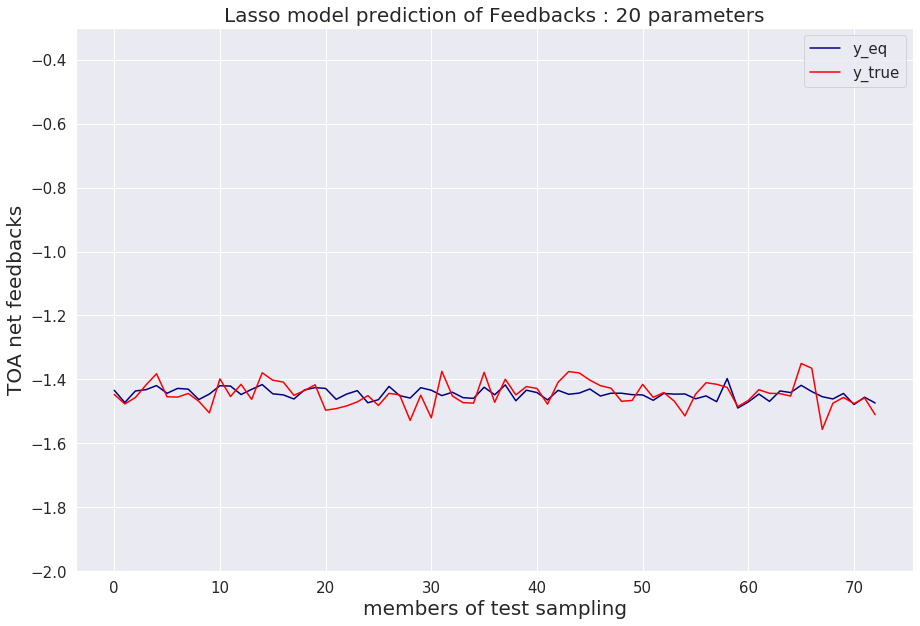

In [217]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members_0", y="y_eq", data=DFYeq_lasso, color='navy',ax=ax)
ax = sns.lineplot(x="members_0", y="y_true", data=DFYeq_lasso, color='red',ax=ax)
plt.title('Lasso model prediction of Feedbacks : 20 parameters', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members of test sampling',fontsize=20)
plt.ylabel('TOA net feedbacks',fontsize=20)
plt.ylim(-2, -0.3)
ax.tick_params(axis='both', labelsize=15)

## LASSO model : prediction

In [31]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

FileNotFoundError: [Errno 2] No such file or directory: '/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy'

In [51]:
# Perform the lasso multi linear regression with the alpha found before
lasso = Lasso(alpha=alpha)

lasso.fit(X, y)

print(lasso)
print('Intercept: \n', lasso.intercept_)
print('Coefficients: \n', lasso.coef_)
print('Score: \n', lasso.score(X, y))

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Intercept: 
 -1.365035703564002
Coefficients: 
 [-0.02555491  0.02401777 -0.01508282 -0.02016435  0.02818923]
Score: 
 0.11178945561793341


In [52]:
Coeffs = pd.DataFrame([lasso.coef_], columns=param_names).iloc[0]
#Coeffs = pd.DataFrame([lasso.coef_]).iloc[0]
Coeffs

0   -0.025555
1    0.024018
2   -0.015083
3   -0.020164
4    0.028189
Name: 0, dtype: float64

In [53]:
# Let's use the model equation : 

X_df = pd.DataFrame(data=X)
R = lasso.intercept_

N=len(LHS_df.values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*LHS_df.iloc[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
y_pred

ValueError: operands could not be broadcast together with shapes (5,) (30,) 

In [46]:
members = arange(102,1102,1)
DFYpred_lasso = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred_lasso

,y_pred,members
0,-1.334177,102.0
1,-1.286915,103.0
2,-1.379185,104.0
3,-1.363872,105.0
4,-1.334536,106.0
...,...,...
995,-1.373378,1097.0
996,-1.431346,1098.0
997,-1.310384,1099.0
998,-1.404546,1100.0


## Multi Linear Regression model 

In [188]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/X_param.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/ENSEMBLE3_param_names.npy")

In [198]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 -1.4450728964043533
Coefficients: 
 [-0.00328938 -0.00960848  0.0062118  -0.0125576   0.00851805]
Score: 
 0.18919373376695314


In [199]:
#Coeffs = pd.DataFrame([regr.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs = pd.DataFrame([regr.coef_]).iloc[0]
Coeffs

0   -0.003289
1   -0.009608
2    0.006212
3   -0.012558
4    0.008518
Name: 0, dtype: float64

In [200]:
# Let's write the equation : 
X_df = pd.DataFrame(data=X)
R = regr.intercept_

N=len(X)
tmp = [0]*N
y_eq = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*X_df.iloc[i]
    y_eq[i] = tmp[i].sum()+R
    i+=1
    
#y_eq 

In [201]:
nb_p_list = ['p600','p601','p602','p603','p604','p605','p607','p608','p609','p610','p611','p612',
             'p613','p614','p615','p616','p617','p618','p619','p621','p623','p625','p626','p627',
             'p629','p630','p631','p632','p633','p634','p636','p638','p639','p640','p641','p642','p644',
             'p646','p649','p650','p651','p652','p653','p655','p656','p657','p658',
             'p661','p662','p663','p664','p666','p668','p669','p670','p671','p674','p675','p676',
             'p677','p678','p679','p680','p681','p682','p683','p684','p685','p686','p687','p688','p689','p690']

y_true = y

DFYeq = pd.DataFrame([y_true, y_eq], index=['y_true', 'y_eq']).transpose()
DFYeq['members'] = nb_p_list
DFYeq['members_0'] = range(0,73,1)
#DF=DFYeq.sort_values(by='y_true')
DFYeq

,y_true,y_eq,members,members_0
0,-1.446859,-1.433837,p600,0
1,-1.476661,-1.472602,p601,1
2,-1.456585,-1.435902,p602,2
3,-1.417429,-1.431763,p603,3
4,-1.382174,-1.418781,p604,4
...,...,...,...,...
68,-1.474378,-1.461262,p686,68
69,-1.456299,-1.443701,p687,69
70,-1.475609,-1.478864,p688,70
71,-1.457760,-1.455841,p689,71


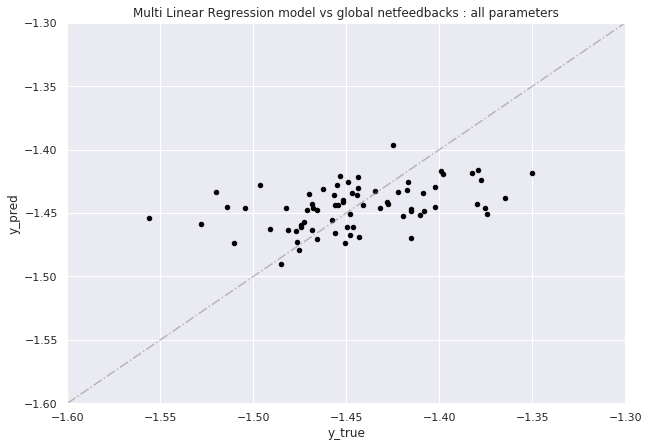

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = plt.gca()
title = 'Multi Linear Regression model vs global netfeedbacks : all parameters'

diag = pd.DataFrame(range(-4,5,1))
diag['x'] = diag[0]
diag['y'] = diag[0]
diag = diag.drop(columns = 0)
diag.plot(kind='line', x='x', y='y', color='gray', alpha=0.5, legend = False,linestyle='-.', ax = ax)

DFYeq.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title(title)
plt.xlim(-1.6,-1.3)
plt.ylim(-1.6,-1.3)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

Coefficients: 
 [0.16261169]
Coefficient of determination: -0.02


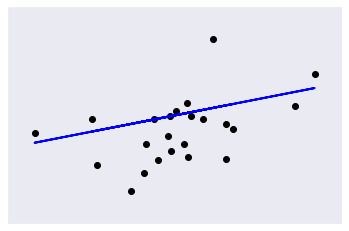

In [203]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
X_train = y_true[:50].reshape(-1, 1)
X_test = y_true[50:].reshape(-1, 1)

# Split the targets into training/testing sets
y_train = y_eq[:50]#.reshape(-1, 1) 
y_test = y_eq[50:]#.reshape(-1, 1)
#y_train

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print('Mean squared error: %.2f'
#      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=2.0)

plt.xticks(())
plt.yticks(())

plt.show()

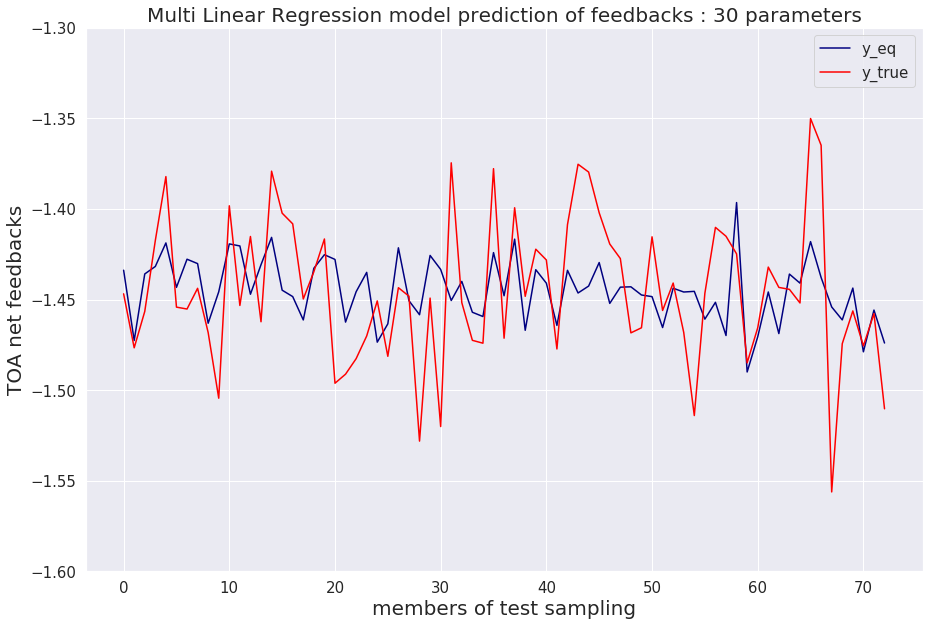

In [204]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members_0", y="y_eq", data=DFYeq, color='navy',ax=ax)
ax = sns.lineplot(x="members_0", y="y_true", data=DFYeq, color='red',ax=ax)
plt.title('Multi Linear Regression model prediction of feedbacks : 30 parameters', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members of test sampling',fontsize=20)
plt.ylabel('TOA net feedbacks',fontsize=20)
plt.ylim(-1.6, -1.3)
ax.tick_params(axis='both', labelsize=15)

## Multi Linear Regression model : prediction

In [55]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [56]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 -1.365035703564002
Coefficients: 
 [ 0.00653055 -0.01819391  0.00219821 -0.06344135  0.03409543  0.04018202
  0.02023204  0.03256797 -0.00244833 -0.00594943  0.02828375 -0.00740924
 -0.03135033  0.0127495   0.01865518 -0.00617013 -0.04823539  0.01493511
 -0.03440692  0.0134147  -0.03867545  0.06073337 -0.01342743 -0.04019921
  0.00937868 -0.00454055  0.00619481  0.03386664 -0.01771072 -0.0172784 ]
Score: 
 0.2986249927511614


In [57]:
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs
#Coeffs_sorted = Coeffs.sort_values()
#Coeffs_sorted

AKN            0.006531
ALPHAT        -0.018194
ALD            0.002198
ALMAVE        -0.063441
AGREF          0.034095
AGRE1          0.040182
AGRE2          0.020232
RAUTEFR        0.032568
RQLCR         -0.002448
RAUTEFS       -0.005949
RQICRMIN       0.028284
RQICRMAX      -0.007409
TFVL          -0.031350
TFVI           0.012749
TFVR           0.018655
TFVS          -0.006170
RKDN          -0.048235
RKDX           0.014935
TENTR         -0.034407
TENTRX         0.013415
VVN           -0.038675
VVX            0.060733
ALFX          -0.013427
FNEBC         -0.040199
GCTURB         0.009379
RLWINHF_ICE   -0.004541
RLWINHF_LIQ    0.006195
RSWINHF_ICE    0.033867
RSWINHF_LIQ   -0.017711
REFLCAPE      -0.017278
Name: 0, dtype: float64

In [58]:
# Let's use the model equation : 

R = regr.intercept_

N=len(LHS_df.values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*LHS_df.iloc[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
y_pred

[-1.3217861707190603,
 -1.30067565644154,
 -1.4522939333083609,
 -1.320285700726427,
 -1.2987882355510159,
 -1.4055401352466728,
 -1.3022418337936843,
 -1.4202530976259387,
 -1.4555990006394606,
 -1.4588804564380822,
 -1.4383671163518859,
 -1.6674526468129802,
 -1.3171046549769236,
 -1.3337797362017545,
 -1.436823504823804,
 -1.3518336352740308,
 -1.5508685746366686,
 -1.273228142383994,
 -1.2990372077581187,
 -1.2846364343392975,
 -1.275943491329936,
 -1.3227028077656116,
 -1.6569264300847857,
 -1.4323591375300238,
 -1.3323198066016066,
 -1.4987822632912877,
 -1.5958289804534354,
 -1.4656475357572645,
 -1.3181108701952184,
 -1.5760186280656754,
 -1.5230369073148964,
 -1.4440498394428103,
 -1.4904012410716265,
 -1.3916324938478444,
 -1.4392479281358865,
 -1.1681332662383084,
 -1.6238668399825327,
 -1.236630178063067,
 -1.136429798903291,
 -1.3587192411899993,
 -1.5070417259505902,
 -1.3874221520633148,
 -1.3401954406605034,
 -1.554236751971031,
 -1.4949475021569025,
 -1.392614758793938

In [59]:
members = arange(102,1102,1)
DFYpred = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred

,y_pred,members
0,-1.321786,102.0
1,-1.300676,103.0
2,-1.452294,104.0
3,-1.320286,105.0
4,-1.298788,106.0
...,...,...
995,-1.274571,1097.0
996,-1.554541,1098.0
997,-1.236933,1099.0
998,-1.421715,1100.0


## Neural Network 

In [218]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/X_param.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/ENSEMBLE3_param_names.npy")

In [219]:
# split the dataset
X_train = X[0:50,:]
X_test = X[50:,:]
#X_val = X[40:,:]

y_train = y[0:50]
y_test = y[50:]
#y_val = y[40:]

In [220]:
skill_score=[]

i=1
N=100
while i<N: 
    NN = MLPRegressor(alpha=0.01, hidden_layer_sizes=(i, 2))
    NN = NN.fit(X_train,y_train)
    y_pred = NN.predict(X_test)
    score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    skill_score.append(score)
    i = ( i + 1 )

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

In [221]:
## BUILD the SKILL dataframe
skill_maxIter = pd.DataFrame()
skill_maxIter['hidden_layer_sizes']=np.arange(1,100,1)
skill_maxIter['RMSE']=skill_score

skill_maxIter

,hidden_layer_sizes,RMSE
0,1,0.928319
1,2,0.330946
2,3,2.260581
3,4,1.228002
4,5,0.089281
...,...,...
94,95,0.390377
95,96,0.201760
96,97,0.325892
97,98,1.393799


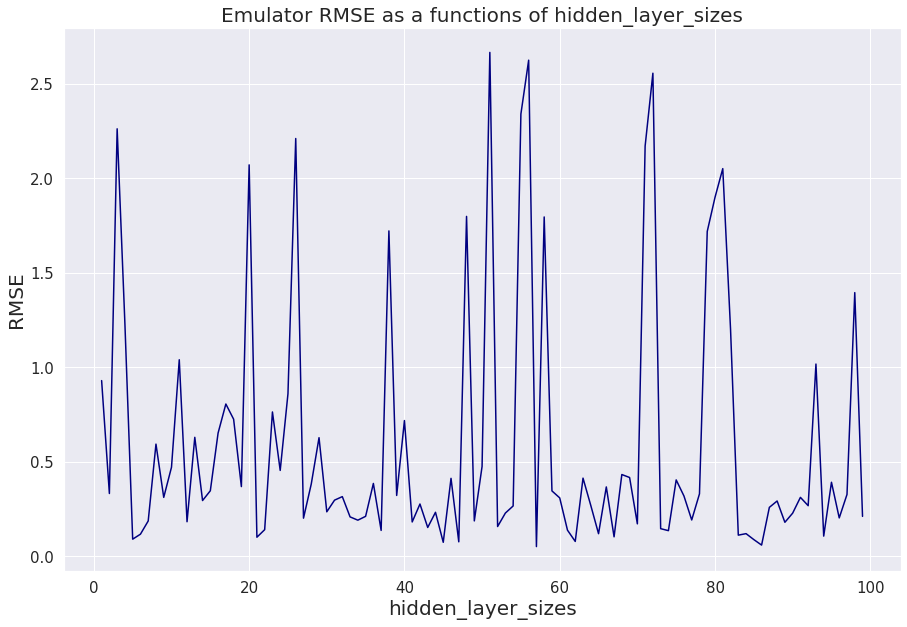

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the skill_score    
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="hidden_layer_sizes", y="RMSE", data=skill_maxIter,color='navy',ax=ax)
plt.title('Emulator RMSE as a functions of hidden_layer_sizes', fontsize=20)
plt.xlabel('hidden_layer_sizes',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
ax.tick_params(axis='both', labelsize=15)

#   Enregistrer les figures ...............................................................

#plt.savefig("/data/home/globc/peatier/figures/Hyperparameters_tuning_log.png", dpi=None, 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show plot 
plt.show()

In [223]:
skill_score=[]

i=1
N=10
while i<N: 
    NN = MLPRegressor(alpha=0.01, hidden_layer_sizes=(5, i))
    NN = NN.fit(X_train,y_train)
    y_pred = NN.predict(X_test)
    score = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    skill_score.append(score)
    i = ( i + 1 )

/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

In [224]:
## BUILD the SKILL dataframe
skill_maxIter = pd.DataFrame()
skill_maxIter['n_layer']=np.arange(1,10,1)
skill_maxIter['RMSE']=skill_score

skill_maxIter

,n_layer,RMSE
0,1,2.979737
1,2,0.393921
2,3,1.414891
3,4,0.586687
4,5,0.685957
5,6,0.814285
6,7,1.179414
7,8,0.432838
8,9,0.314427


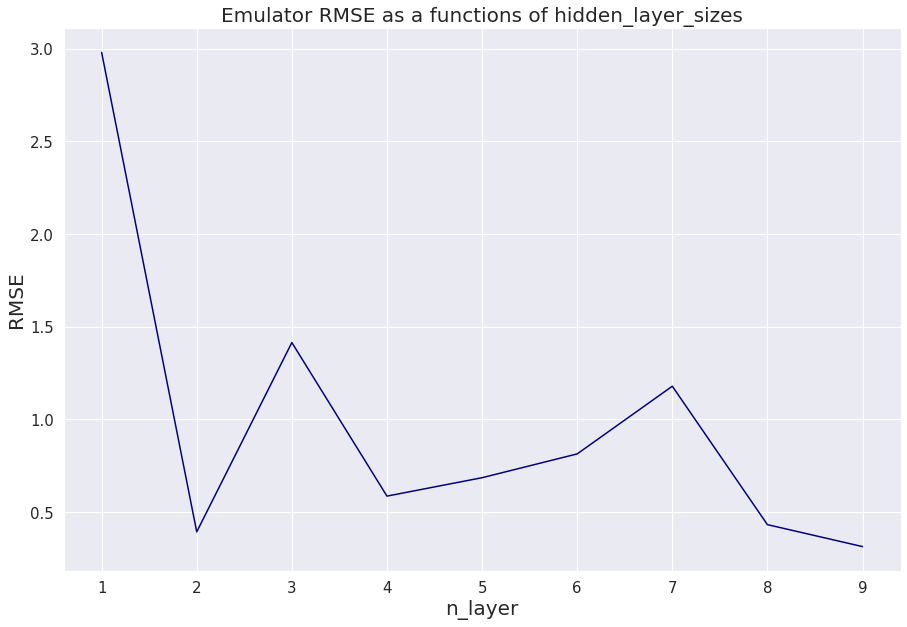

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the skill_score    
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="n_layer", y="RMSE", data=skill_maxIter,color='navy',ax=ax)
plt.title('Emulator RMSE as a functions of hidden_layer_sizes', fontsize=20)
plt.xlabel('n_layer',fontsize=20)
plt.ylabel('RMSE',fontsize=20)
ax.tick_params(axis='both', labelsize=15)

#   Enregistrer les figures ...............................................................

#plt.savefig("/data/home/globc/peatier/figures/Hyperparameters_tuning_log.png", dpi=None, 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show plot 
plt.show()

## Création du modèle

In [374]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/X_param.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE3/files/npy/ENSEMBLE3_param_names.npy")

In [375]:
# split the dataset
X_train = X[0:50,:]
X_test = X[50:,:]
#X_val = X[40:,:]

y_train = y[0:50]
y_test = y[50:]
#y_val = y[40:]

In [414]:
NN = MLPRegressor(hidden_layer_sizes=(3), max_iter=1000)
NN = NN.fit(X_train,y_train)

y_val = NN.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_val))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_val)))

Mean Absolute Error: 0.28996371686817624
Mean Squared Error: 0.1120053136411041
Root Mean Squared Error: 0.33467194928930644


In [415]:
DFYeq_NN  = pd.DataFrame()
DFYeq_NN['y_eq'] = y_val
DFYeq_NN['y_true'] = y_test
DFYeq_NN['members'] = range(0,23,1)
DFYeq_NN

,y_eq,y_true,members
0,-1.328640,-1.415407,0
1,-0.907403,-1.456046,1
2,-1.492507,-1.440921,2
3,-1.109883,-1.468184,3
4,-1.080753,-1.514047,4
5,-1.060386,-1.446570,5
6,-0.996715,-1.410200,6
7,-0.966162,-1.415091,7
8,-1.491594,-1.424820,8
9,-1.407539,-1.484973,9


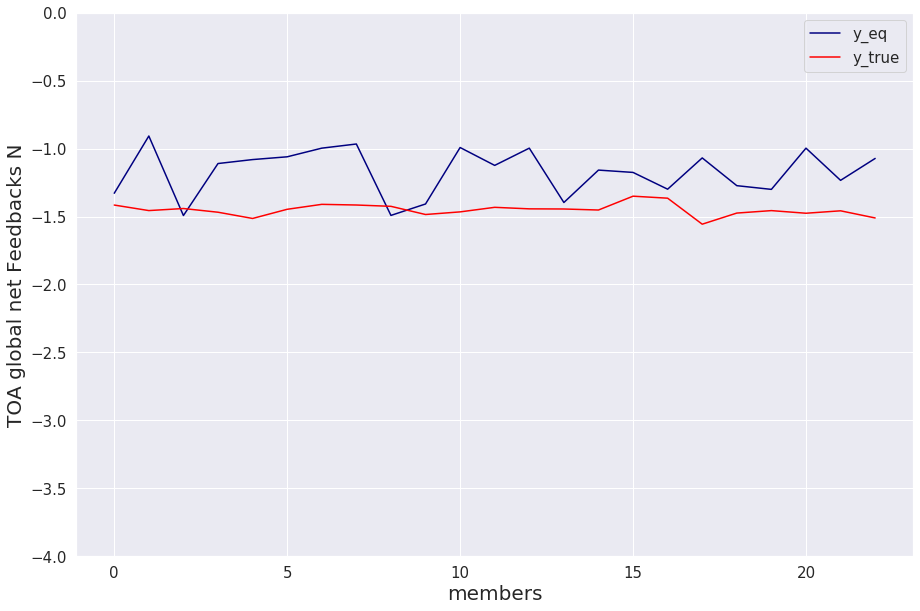

In [416]:
# Plot y_pred and y_test  
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(x="members", y="y_eq", data=DFYeq_NN,color='navy',ax=ax)
ax = sns.lineplot(x="members", y="y_true", data=DFYeq_NN,color='red',ax=ax)
#plt.title('Emulator RMSE as a functions of max_iter', fontsize=20)
plt.legend(['y_eq','y_true'],fontsize=15)
plt.xlabel('members',fontsize=20)
plt.ylabel('TOA global net Feedbacks N',fontsize=20)
plt.ylim(-4, 0)
ax.tick_params(axis='both', labelsize=15)

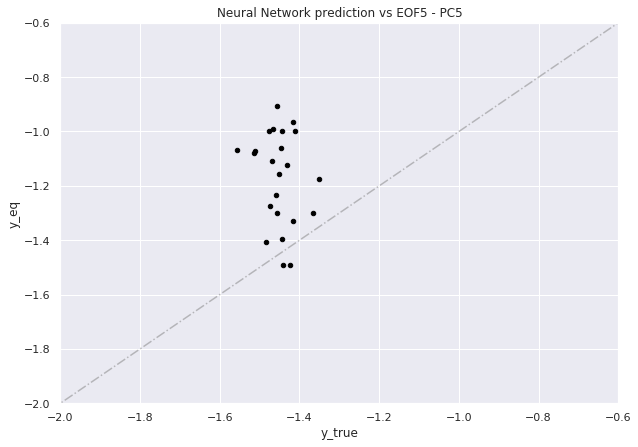

In [417]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

ax = plt.gca()
title = 'Neural Network prediction vs EOF5 - PC5'

diag = pd.DataFrame(range(-4,5,1))
diag['x'] = diag[0]
diag['y'] = diag[0]
diag = diag.drop(columns = 0)
diag.plot(kind='line', x='x', y='y', color='gray', alpha=0.5, legend = False,linestyle='-.', ax = ax)



DFYeq_NN.plot(kind='scatter', x='y_true', y='y_eq', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('y_true')
plt.ylabel('y_eq')
plt.title(title)
plt.xlim(-2,-0.6)
plt.ylim(-2,-0.6)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [418]:
y_val_full = NN.predict(X)

DFYeq_full_NN  = pd.DataFrame()
DFYeq_full_NN['y_eq'] = y_val_full
DFYeq_full_NN['y_true'] = y
DFYeq_full_NN

,y_eq,y_true
0,-1.284979,-1.446859
1,-1.758328,-1.476661
2,-1.247846,-1.456585
3,-0.996715,-1.417429
4,-1.383444,-1.382174
...,...,...
68,-1.272761,-1.474378
69,-1.300057,-1.456299
70,-0.996715,-1.475609
71,-1.233635,-1.457760


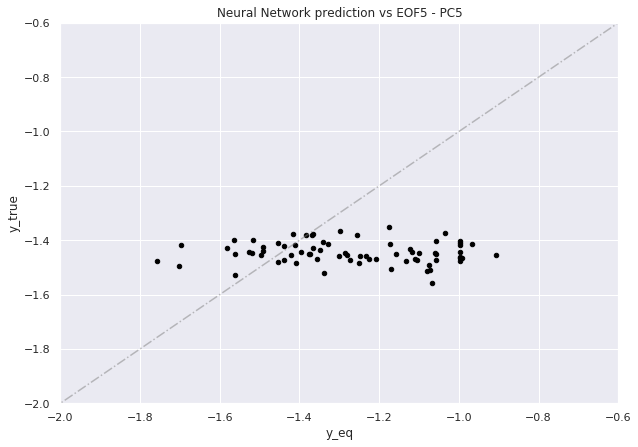

In [419]:
ax = plt.gca()
title = 'Neural Network prediction vs EOF5 - PC5'

diag = pd.DataFrame(range(-4,5,1))
diag['x'] = diag[0]
diag['y'] = diag[0]
diag = diag.drop(columns = 0)
diag.plot(kind='line', x='x', y='y', color='gray', alpha=0.5, legend = False,linestyle='-.', ax = ax)



DFYeq_full_NN.plot(kind='scatter', x='y_eq', y='y_true', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('y_eq')
plt.ylabel('y_true')
plt.title(title)
plt.xlim(-2,-0.6)
plt.ylim(-2,-0.6)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Neural Network : prediction

In [11]:
LHS = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS1000_param.npy")
LHS_df = pd.DataFrame(LHS)

lhs = LHS_df.values
LHS_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.565172,0.994695,-0.389752,-1.209212,-1.053494,0.713304,1.051234,-1.713772,1.301493,0.193472,...,1.013497,1.176859,-1.066320,-0.989915,0.984342,-1.464698,1.672806,-1.124501,-1.348892,-1.298346
1,-0.607856,1.074172,0.930665,0.149216,0.284487,1.630226,1.254728,-1.113082,-1.429732,-1.703882,...,1.237156,1.142672,0.403526,-1.631440,-0.908980,0.635131,-0.399331,-1.598175,-1.121259,-0.252785
2,1.197689,-1.034007,-0.003275,-0.380187,-1.692290,0.546502,-0.566150,-0.455078,-1.188444,0.092375,...,0.577240,0.570916,0.469380,-1.259347,0.805844,-1.069435,-1.469087,-0.057380,-1.278698,0.003951
3,-0.591012,1.161000,1.151455,0.220174,1.025016,1.326794,-0.168701,1.725910,0.434731,0.256193,...,1.678255,-0.533409,1.153710,0.992228,-1.697355,1.239907,0.433749,1.123067,-0.386052,-1.133018
4,-0.568184,-0.911097,-0.531358,-0.314841,-0.977614,1.258632,0.456134,0.394475,-0.927458,0.939614,...,1.621157,0.838729,1.537567,0.820279,0.346069,-1.492503,0.064010,-0.977250,0.913109,-1.307766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.050921,-1.040621,-1.645828,-1.601167,0.998878,-1.717096,0.366971,-1.172354,0.427040,-1.012340,...,-0.721435,0.289542,0.609493,0.552108,0.023283,0.031093,-0.389465,1.379774,0.727080,0.826987
996,1.388490,0.486936,-0.282358,0.450882,0.326523,-0.860082,-0.101825,-1.164841,0.253586,1.666030,...,0.124414,-0.825168,1.482591,1.023450,-1.365154,-0.705285,-0.468126,-1.063751,-1.678253,1.142211
997,0.074900,-0.396218,0.940055,-0.443194,-0.535519,0.711117,1.177926,1.466776,0.596664,-0.031375,...,0.164730,1.522576,1.054532,0.255291,-1.338608,-0.330210,0.966779,-1.457269,0.731497,-0.071212
998,-1.087803,-1.230690,0.774113,1.509690,0.438399,1.205506,-1.073673,-1.479586,1.685155,-0.144882,...,-0.533247,1.450139,1.211890,0.634079,1.242793,-0.402700,0.866732,-0.209826,1.028537,-0.728988


In [12]:
y_pred = NN.predict(LHS_df)

In [13]:
members = arange(102,1102,1)
DFYpred_NN = pd.DataFrame([y_pred, members], index=["y_pred", "members"]).transpose()
DFYpred_NN

,y_pred,members
0,-0.835514,102.0
1,-1.546407,103.0
2,-1.842164,104.0
3,-0.273380,105.0
4,0.246862,106.0
...,...,...
995,-1.712002,1097.0
996,-1.047034,1098.0
997,-0.756230,1099.0
998,-1.949467,1100.0


# Plotting Part

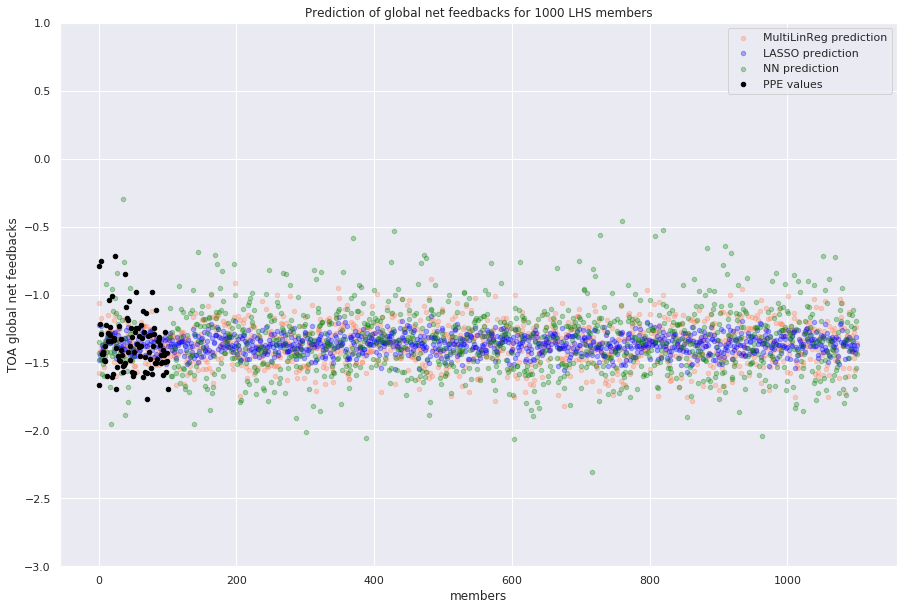

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
title = 'Prediction of global net feedbacks for 1000 LHS members'

# y_true validation
DFYeq.plot(kind='scatter', x='members_0', y='y_eq', color='coral', alpha = 0.3,
                     style='.', legend=False, ax = ax)
DFYeq_lasso.plot(kind='scatter', x='members_0',legend=False, y='y_eq', color='blue', alpha = 0.3,
                     style='.', ax = ax)
DFYeq_NN.plot(kind='scatter', x='members',legend=False, y='y_eq', color='green', alpha = 0.3,
                     style='.', ax = ax)

# (y_true) : PC1 - EOF1 dans l'ensemble
DFYeq.plot(kind='scatter', x='members_0', y='y_true', color='black', 
                     style='.', ax = ax)

# LHS Prediction
DFYpred.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='coral', 
             alpha=0.3,linewidth=1.0,ax=ax)
DFYpred_lasso.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='blue', 
             alpha=0.3,linewidth=1.0,ax=ax)
DFYpred_NN.plot(y='y_pred',x='members',kind='scatter',title=title,legend=True, color='green', 
             alpha=0.3,linewidth=1.0,ax=ax)


plt.xlabel('members')
plt.ylabel('TOA global net feedbacks')
plt.legend(['MultiLinReg prediction', 'LASSO prediction', 'NN prediction','PPE values'])
plt.title(title)
#plt.xlim(-4,200)
plt.ylim(-3,1)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [61]:
MultiLinReg_validation = DFYeq['y_eq'].values
MultiLinReg_prediction = DFYpred['y_pred'].values

LASSO_validation = DFYeq_lasso['y_eq'].values
LASSO_prediction = DFYpred_lasso['y_pred'].values

NN_validation = DFYeq_NN['y_eq'].values
NN_prediction = DFYpred_NN['y_pred'].values

# Save the predictionc in numpy arrays : 
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_validation_FdbckN.npy', 
        MultiLinReg_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/MultiLinReg_prediction_FdbckN.npy', 
        MultiLinReg_prediction)

np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/NN_validation_FdbckN.npy', 
        NN_validation)
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/NN_prediction_FdbckN.npy', 
        NN_prediction)

# Choix des paramètres réduits 

## Net feedbacks

In [13]:
Coeffs_abs = Coeffs.abs().sort_values()
Coeffs_abs

coeff_df = pd.DataFrame()
coeff_df['coeff'] = Coeffs_abs
coeff_df['param'] = range(0,30,1)
coeff_df

,coeff,param
ALD,0.002198,0
RQLCR,0.002448,1
RLWINHF_ICE,0.004541,2
RAUTEFS,0.005949,3
TFVS,0.006170,4
RLWINHF_LIQ,0.006195,5
AKN,0.006531,6
RQICRMAX,0.007409,7
GCTURB,0.009379,8
TFVI,0.012749,9


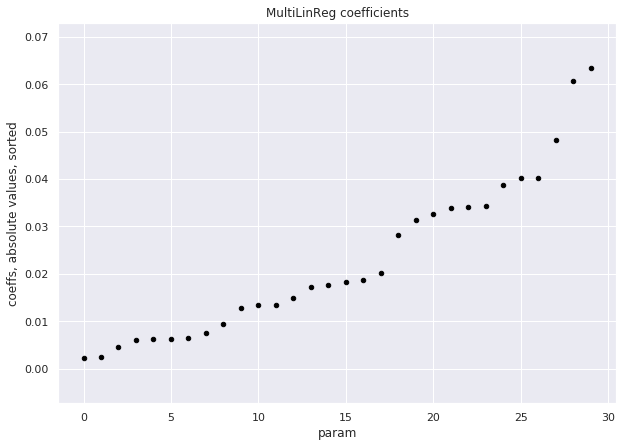

In [15]:
ax = plt.gca()
title = 'MultiLinReg coefficients'
coeff_df.plot(kind='scatter', x='param', y='coeff', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('param')
plt.ylabel('coeffs, absolute values, sorted')
plt.title(title)
#plt.xlim(-2,0)
#plt.ylim(-2,0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [33]:
param_reduce_df = pd.DataFrame()
param_reduce_df['ALMAVE'] = X[:,3]
param_reduce_df['VVX'] = X[:,21]
param_reduce_df['RKDN'] = X[:,16]
param_reduce_df['FNEBC'] = X[:,23]
param_reduce_df['AGRE1'] = X[:,5]

param_reduce_df

,ALMAVE,VVX,RKDN,FNEBC,AGRE1
0,0.430787,1.051322,0.102950,-1.314350,0.431537
1,-0.052349,-0.856404,-0.059809,1.002380,-1.340086
2,0.385616,0.203602,1.197834,1.671869,-1.279800
3,-1.606987,-0.993339,-0.028011,0.753320,-0.208517
4,-1.149318,0.686770,-0.837466,1.323667,1.156456
...,...,...,...,...,...
97,1.086707,1.524833,-0.851678,-0.915265,1.725910
98,1.325052,-0.940250,0.409583,0.630209,-1.328490
99,-0.015141,-0.779767,-0.149940,0.759087,0.457391
100,-1.639490,-0.483038,0.939432,1.214026,0.486299


In [35]:
param_reduce = param_reduce_df.values

# Save the predictionc in numpy arrays : 
np.save('/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy', 
        param_reduce)

## SW feedbacks

In [37]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/SW_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [38]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 -0.5970287711962181
Coefficients: 
 [-0.00506046  0.01154738 -0.01967604  0.09949969 -0.01675332 -0.05287702
 -0.01764095 -0.03660712 -0.03283244 -0.00081722 -0.00545908  0.00443042
  0.0056791  -0.03776672 -0.01952765  0.03107677  0.02480057 -0.02471379
  0.03756721 -0.03095131  0.01002041 -0.06568196 -0.01067926  0.00321688
 -0.01283055 -0.00294645 -0.03470184 -0.04745912 -0.02064143 -0.00416045]
Score: 
 0.34447398150413033


In [39]:
#Coeffs = pd.DataFrame([regr.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs

AKN           -0.005060
ALPHAT         0.011547
ALD           -0.019676
ALMAVE         0.099500
AGREF         -0.016753
AGRE1         -0.052877
AGRE2         -0.017641
RAUTEFR       -0.036607
RQLCR         -0.032832
RAUTEFS       -0.000817
RQICRMIN      -0.005459
RQICRMAX       0.004430
TFVL           0.005679
TFVI          -0.037767
TFVR          -0.019528
TFVS           0.031077
RKDN           0.024801
RKDX          -0.024714
TENTR          0.037567
TENTRX        -0.030951
VVN            0.010020
VVX           -0.065682
ALFX          -0.010679
FNEBC          0.003217
GCTURB        -0.012831
RLWINHF_ICE   -0.002946
RLWINHF_LIQ   -0.034702
RSWINHF_ICE   -0.047459
RSWINHF_LIQ   -0.020641
REFLCAPE      -0.004160
Name: 0, dtype: float64

In [40]:
Coeffs_abs = Coeffs.abs().sort_values()
Coeffs_abs

coeff_df = pd.DataFrame()
coeff_df['coeff'] = Coeffs_abs
coeff_df['param'] = range(0,30,1)
coeff_df

,coeff,param
RAUTEFS,0.000817,0
RLWINHF_ICE,0.002946,1
FNEBC,0.003217,2
REFLCAPE,0.004160,3
RQICRMAX,0.004430,4
AKN,0.005060,5
RQICRMIN,0.005459,6
TFVL,0.005679,7
VVN,0.010020,8
ALFX,0.010679,9


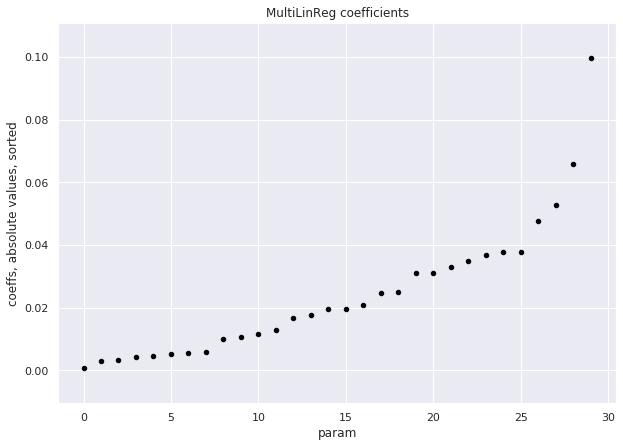

In [41]:
ax = plt.gca()
title = 'MultiLinReg coefficients'
coeff_df.plot(kind='scatter', x='param', y='coeff', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('param')
plt.ylabel('coeffs, absolute values, sorted')
plt.title(title)
#plt.xlim(-2,0)
#plt.ylim(-2,0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## LW feedbacks

In [42]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/LW_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [43]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 1.96206403947344
Coefficients: 
 [-0.00146999  0.00664656  0.01747777 -0.03605845 -0.01734195  0.01269506
 -0.00259151  0.00403931  0.03528084  0.00676649 -0.02282498  0.00297893
  0.02567137  0.02501761  0.00087279 -0.02490699  0.02343476  0.00977809
 -0.00316017  0.01753679  0.02865489  0.00494863  0.02410674  0.03698236
  0.00345189  0.00748696  0.02850689  0.0135922   0.03835209  0.02143886]
Score: 
 0.33732948751677905


In [44]:
#Coeffs = pd.DataFrame([regr.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs

AKN           -0.001470
ALPHAT         0.006647
ALD            0.017478
ALMAVE        -0.036058
AGREF         -0.017342
AGRE1          0.012695
AGRE2         -0.002592
RAUTEFR        0.004039
RQLCR          0.035281
RAUTEFS        0.006766
RQICRMIN      -0.022825
RQICRMAX       0.002979
TFVL           0.025671
TFVI           0.025018
TFVR           0.000873
TFVS          -0.024907
RKDN           0.023435
RKDX           0.009778
TENTR         -0.003160
TENTRX         0.017537
VVN            0.028655
VVX            0.004949
ALFX           0.024107
FNEBC          0.036982
GCTURB         0.003452
RLWINHF_ICE    0.007487
RLWINHF_LIQ    0.028507
RSWINHF_ICE    0.013592
RSWINHF_LIQ    0.038352
REFLCAPE       0.021439
Name: 0, dtype: float64

In [45]:
Coeffs_abs = Coeffs.abs().sort_values()
Coeffs_abs

coeff_df = pd.DataFrame()
coeff_df['coeff'] = Coeffs_abs
coeff_df['param'] = range(0,30,1)
coeff_df

,coeff,param
TFVR,0.000873,0
AKN,0.001470,1
AGRE2,0.002592,2
RQICRMAX,0.002979,3
TENTR,0.003160,4
GCTURB,0.003452,5
RAUTEFR,0.004039,6
VVX,0.004949,7
ALPHAT,0.006647,8
RAUTEFS,0.006766,9


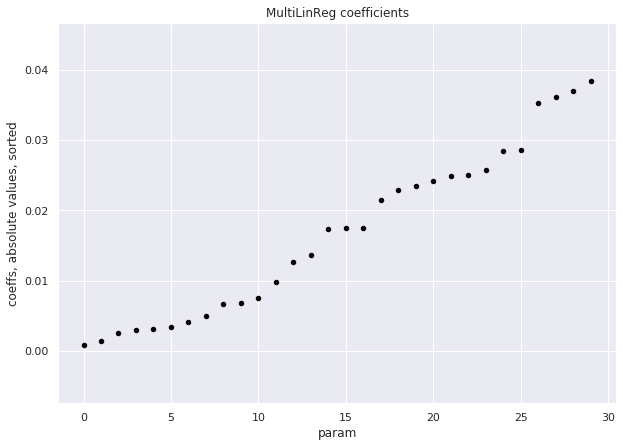

In [46]:
ax = plt.gca()
title = 'MultiLinReg coefficients'
coeff_df.plot(kind='scatter', x='param', y='coeff', color='black', figsize=(10, 7), 
                     style='.', ax = ax)
#plt.plot(X_test, y_pred, color='blue', linewidth=1.0)

plt.xlabel('param')
plt.ylabel('coeffs, absolute values, sorted')
plt.title(title)
#plt.xlim(-2,0)
#plt.ylim(-2,0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/PPE_MultiLinReg_all.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

## Sobol analysis

In [12]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF3pc_N.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [13]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import pandas as pd


# Set the boundaries of the parameter values
bounds=[]
for i in range(0,len(param_names),1):
    bounds_tmp=[X[:,i].min(), X[:,i].max()]
    bounds.append(bounds_tmp)
                                                      
# Define the problem
problem = {
    'num_vars': len(param_names),
    'names': [param_names],
    'bounds' : bounds
}


# Make the Satelli sampling
param_values = saltelli.sample(problem, 1000)


In [14]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)
print('Score: \n', regr.score(X, y))

Intercept: 
 -1.365035703564002
Coefficients: 
 [ 0.00653055 -0.01819391  0.00219821 -0.06344135  0.03409543  0.04018202
  0.02023204  0.03256797 -0.00244833 -0.00594943  0.02828375 -0.00740924
 -0.03135033  0.0127495   0.01865518 -0.00617013 -0.04823539  0.01493511
 -0.03440692  0.0134147  -0.03867545  0.06073337 -0.01342743 -0.04019921
  0.00937868 -0.00454055  0.00619481  0.03386664 -0.01771072 -0.0172784 ]
Score: 
 0.2986249927511614


In [15]:
#Coeffs = pd.DataFrame([regr.coef_], columns=['ALMAVE', 'VVX', 'RKDN', 'FNEBC', 'AGRE1']).iloc[0]
Coeffs = pd.DataFrame([regr.coef_]*30, columns=param_names).iloc[0]
Coeffs

AKN            0.006531
ALPHAT        -0.018194
ALD            0.002198
ALMAVE        -0.063441
AGREF          0.034095
AGRE1          0.040182
AGRE2          0.020232
RAUTEFR        0.032568
RQLCR         -0.002448
RAUTEFS       -0.005949
RQICRMIN       0.028284
RQICRMAX      -0.007409
TFVL          -0.031350
TFVI           0.012749
TFVR           0.018655
TFVS          -0.006170
RKDN          -0.048235
RKDX           0.014935
TENTR         -0.034407
TENTRX         0.013415
VVN           -0.038675
VVX            0.060733
ALFX          -0.013427
FNEBC         -0.040199
GCTURB         0.009379
RLWINHF_ICE   -0.004541
RLWINHF_LIQ    0.006195
RSWINHF_ICE    0.033867
RSWINHF_LIQ   -0.017711
REFLCAPE      -0.017278
Name: 0, dtype: float64

In [27]:

# Run the emulator for all of the cases

R = regr.intercept_

N=len(param_values)
tmp = [0]*N
y_pred = [0]*N
i=0
Ycpt=0
while i<N:
    tmp[i] = Coeffs.values*param_values[i]
    y_pred[i] = tmp[i].sum()+R
    i+=1
    
    
# Perform analysis
y_pred=np.array(y_pred)
Si = sobol.analyze(problem, y_pred)
print(Si['S1'])

[1.41360748e-03 1.22063120e-02 1.38542612e-04 1.80484090e-01
 4.63353726e-02 5.81355165e-02 1.57735832e-02 4.20565633e-02
 5.34126305e-04 1.43929242e-03 4.58586446e-02 2.40758342e-03
 4.05875359e-02 6.99756680e-03 1.35766779e-02 9.59653716e-04
 9.94083151e-02 9.83775406e-03 4.83830817e-02 7.38525107e-03
 6.05670294e-02 1.56032569e-01 1.01515084e-02 6.53062071e-02
 4.68032789e-03 7.77979965e-04 1.09387804e-03 5.20944858e-02
 1.06740485e-02 1.44707527e-02]


/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


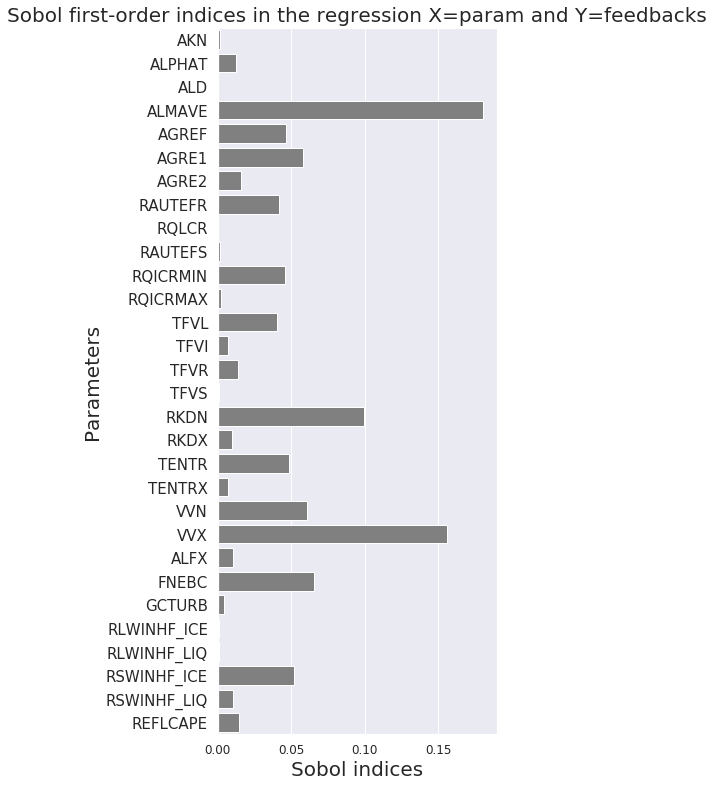

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data=pd.DataFrame()
data['Parameters']=param_names
data['Sobol1']=Si['S1']

# Plot the Sobol index to identify the most important parameters 
fig, ax = plt.subplots(figsize=(5,13))
ax = sns.barplot(x='Sobol1',y='Parameters',data=data, color='grey', orient='h', ax=ax)

plt.title('Sobol first-order indices in the regression X=param and Y=feedbacks', fontsize=20)
plt.xlabel('Sobol indices', fontsize=20)
plt.ylabel('Parameters', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=12)
    
#plt.show()

#   Enregistrer les figures ...............................................................

plt.savefig("/data/home/globc/peatier/figures/Sobol_indices.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

## Sobol analysis with Neural Network 

In [27]:
# Set the X and Y : Y = f(X)
#X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/param_reduce.npy")
X = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/X_EmulateurFeedbacksN.npy")
#y = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/PPE2_EOF1pc_SW.npy")
y = np.load(file = "/data/home/globc/peatier/CNRMppe/PPE/files/npy/Net_feedbacks.npy")
param_names = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/files/npy/LHS_paramNames.npy")

In [28]:
# split the dataset
X_train = X[0:80,:]
X_test = X[80:,:]
#X_val = X[40:,:]

y_train = y[0:80]
y_test = y[80:]
#y_val = y[40:]

In [29]:
NN = MLPRegressor(hidden_layer_sizes=(5,2))
NN = NN.fit(X_train,y_train)

y_val = NN.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_val))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_val))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_val)))

Mean Absolute Error: 0.20953755068176347
Mean Squared Error: 0.05858789224202207
Root Mean Squared Error: 0.24204935910268813


/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [30]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import pandas as pd


# Set the boundaries of the parameter values
bounds=[]
for i in range(0,len(param_names),1):
    bounds_tmp=[X[:,i].min(), X[:,i].max()]
    bounds.append(bounds_tmp)
                                                      
# Define the problem
problem = {
    'num_vars': len(param_names),
    'names': [param_names],
    'bounds' : bounds
}


# Make the Satelli sampling
param_values = saltelli.sample(problem, 1000)


In [31]:
# Run the emulator for all of the cases

y_pred = NN.predict(param_values)
    
    
# Perform analysis
y_pred=np.array(y_pred)
Si = sobol.analyze(problem, y_pred)
print(Si['S1'])

[ 0.00475643  0.00012123 -0.00461485  0.02037286  0.00112333 -0.00141046
  0.07326365 -0.01122929  0.0412204   0.00276539  0.04415412  0.00719297
  0.00420398  0.0001798  -0.00794196 -0.00069771  0.04221395  0.00449525
  0.02180457  0.05096107 -0.00808501  0.00251478  0.00878266  0.01542161
  0.00633491  0.00531987  0.01981234  0.0245922  -0.00013325  0.01074494]


/data/scratch/globc/peatier/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


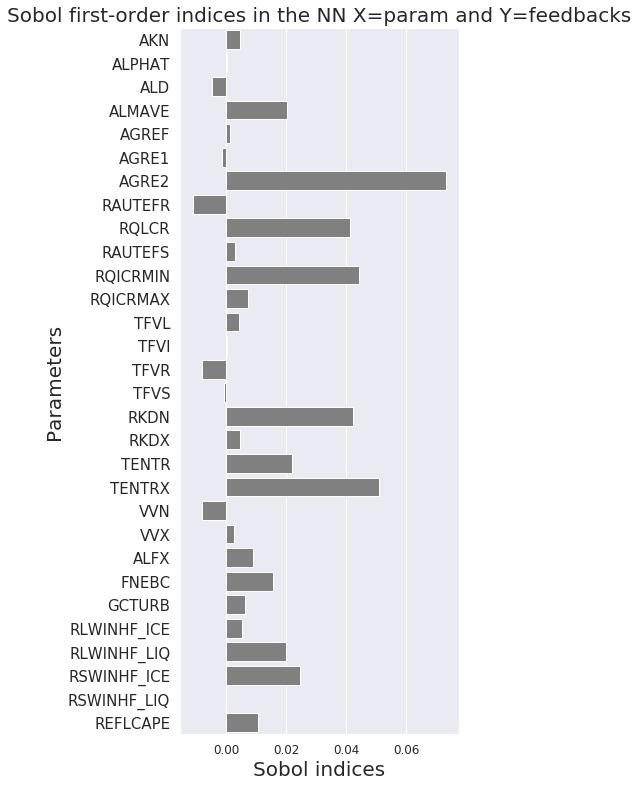

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data=pd.DataFrame()
data['Parameters']=param_names
data['Sobol1']=Si['S1']

# Plot the Sobol index to identify the most important parameters 
fig, ax = plt.subplots(figsize=(5,13))
ax = sns.barplot(x='Sobol1',y='Parameters',data=data, color='grey', orient='h', ax=ax)

plt.title('Sobol first-order indices in the NN X=param and Y=feedbacks', fontsize=20)
plt.xlabel('Sobol indices', fontsize=20)
plt.ylabel('Parameters', fontsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=12)
    
#plt.show()

#   Enregistrer les figures ...............................................................

plt.savefig("/data/home/globc/peatier/figures/Sobol_indices.png", dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)